# Regional wind distribution

## Introduction

<table class="wikitable">
<caption><a class="mw-selflink selflink">Beaufort Wind Scale</a></caption>
<tr style="text-align: center;">
<th style="background-color: #FFFFFF;" id="Beaufort_Number_0"><span title="Calm: &lt;1 mph (&lt;0.3 m/s)">0</span></th>
<th style="background-color: #CCFFFF;" id="Beaufort_Number_1"><span title="Light Air: 1–3&#160;mph (0.3–1.5&#160;m/s)">1</span></th>
<th style="background-color: #99FFCC;" id="Beaufort_Number_2"><span title="Light Breeze: 4–7&#160;mph (1.6–3.3&#160;m/s)">2</span></th>
<th style="background-color: #99FF99;" id="Beaufort_Number_3"><span title="Gentle Breeze: 8–12&#160;mph (3.4–5.5&#160;m/s)">3</span></th>
<th style="background-color: #99FF66;" id="Beaufort_Number_4"><span title="Moderate Breeze: 13–18&#160;mph (5.5–7.9&#160;m/s)">4</span></th>
<th style="background-color: #99FF00;" id="Beaufort_Number_5"><span title="Fresh Breeze: 19–24&#160;mph (8.0–10.7&#160;m/s)">5</span></th>
<th style="background-color: #CCFF00;" id="Beaufort_Number_6"><span title="Strong Breeze: 25–31&#160;mph (10.8–13.8&#160;m/s)">6</span></th>
<th style="background-color: #FFFF00;" id="Beaufort_Number_7"><span title="Near Gale: 32–38&#160;mph (13.9–17.1&#160;m/s)">7</span></th>
<th style="background-color: #FFCC00;" id="Beaufort_Number_8"><span title="Gale: 39–46&#160;mph (17.2–20.7&#160;m/s)">8</span></th>
<th style="background-color: #FF9900;" id="Beaufort_Number_9"><span title="Strong Gale: 47-54&#160;mph (20.8–24.4&#160;m/s)">9</span></th>
<th style="background-color: #FF6600;" id="Beaufort_Number_10"><span title="Storm: 55–63&#160;mph (24.5–28.4&#160;m/s)">10</span></th>
<th style="background-color: #FF3300;" id="Beaufort_Number_11"><span title="Violent Storm: 64–72&#160;mph (28.5–32.6&#160;m/s)">11</span></th>
<th style="background-color: #FF0000;" id="Beaufort_Number_12"><span title="Hurricane Force: ≥73&#160;mph (≥32.7&#160;m/s)">12</span></th>
</tr>
<tr style="text-align: center;">
<td><small>Calm</small></td>
<td><small>Light Air</small></td>
<td><small>Light Breeze</small></td>
<td><small>Gentle Breeze</small></td>
<td><small>Moderate Breeze</small></td>
<td><small>Fresh Breeze</small></td>
<td><small>Strong Breeze</small></td>
<td><small>Near Gale</small></td>
<td><small><a href="/wiki/Gale" title="Gale">Gale</a></small></td>
<td><small>Strong Gale</small></td>
<td><small><a href="/wiki/Storm" title="Storm">Storm</a></small></td>
<td><small>Violent Storm</small></td>
<td><small><a href="/wiki/Hurricane" class="mw-redirect" title="Hurricane">Hurricane</a> Force</small></td>
</tr>
<tr style="text-align: center;">
<td colspan="6"><small>Light Winds</small></td>
<td colspan="2"><small>High Winds</small></td>
<td colspan="2"><small>Gale-force</small></td>
<td colspan="2"><small>Storm-force</small></td>
<td><small>Hurricane-force</small></td>
</tr>
<tr style="text-align: center;">
<td><span style="font-size:75%; line-height: 1.31em;">&lt;1&#160;mph<br />
&lt;1 <a href="/wiki/Knot_(unit)" title="Knot (unit)">knot</a><br />
&lt;0.3 <a href="/wiki/Metre_per_second" title="Metre per second">m/s</a></span></td>
<td><span style="font-size:75%; line-height: 1.31em;">1–3&#160;mph<br />
1–3 knots<br />
0.3–1.5&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">4–7&#160;mph<br />
4–6 knots<br />
1.6–3.3&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">8–12&#160;mph<br />
7–10 knots<br />
3.4–5.5&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">13–18&#160;mph<br />
11–16 knots<br />
5.5–7.9&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">18–24&#160;mph<br />
17–21 knots<br />
8.0–10.7&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">25–31&#160;mph<br />
22–27 knots<br />
10.8–13.8&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">31–38&#160;mph<br />
28–33 knots<br />
13.9–17.1&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">39–46&#160;mph<br />
34–40 knots<br />
17.2–20.7&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">47-54&#160;mph<br />
41–47 knots<br />
20.8–24.4&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">55–63&#160;mph<br />
48–55 knots<br />
24.5–28.4&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">64–72&#160;mph<br />
56–63 knots<br />
28.5–32.6&#160;m/s</span></td>
<td><span style="font-size:75%; line-height: 1.31em;">≥73&#160;mph<br />
≥63 knots<br />
≥32.7&#160;m/s</span></td>
</tr>
</table>

<table class="beufort">
<caption>Vindens  virkning  på  fjellet</caption>
<thead>
<tr>
<th>Navn</th>
<th>Symbol</th>
<th>m/s</th>
<th>knop</th>
<th>Kjennetegn</th>
</tr>
</thead>
<tbody>
<tr>
<td>Stille</td>
<td><a href="http://om.yr.no/wp-content/uploads/2006/09/vindstille.png"><img alt="vindstille" src="http://om.yr.no/wp-content/uploads/2006/09/vindstille.png" width="32" height="32" /></a></td>
<td>0,0-0,2</td>
<td>0-1</td>
<td>Snøfiller  daler  omtrent  rett  ned,  gjerne  i  en  pendlende  bevegelse.</td>
</tr>
<tr>
<td>Flau  vind</td>
<td><img alt="Flau vind" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0000.225.png" /></td>
<td>0,3-1,5</td>
<td>1-3</td>
<td>Så  vidt  følbar.  Det  er  tydelig  at  snøfillene  driver  med  vinden.</td>
</tr>
<tr>
<td>Svak  vind</td>
<td><img alt="Svak vind" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0025.225.png" /></td>
<td>1,6-3,3</td>
<td>4-6</td>
<td>Godt  følbar  i  sterk  kulde.  Snøfillene  beveger  seg  mer  horisontalt  enn  vertikalt.</td>
</tr>
<tr>
<td>Lett  bris</td>
<td><img alt="Lett bris" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0050.225.png" /></td>
<td>3,4-5,4</td>
<td>7-10</td>
<td>Vinden  merkes  tydelig  og  kan  sjenere.  Fallende  snø  synes  å  bevege  seg  meget  raskere  horisontalt  enn  vertikalt.</td>
</tr>
<tr>
<td>Laber  bris</td>
<td><img alt="Laber bris" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0075.225.png" /></td>
<td>5,5-7,9</td>
<td>11-16</td>
<td>Er  ubehagelig  i  kaldt  vær  og  gir  merkbar  motstand.  Fallende  snø  hvirvler  av  sted  med  vinden.  Snødrevet  mot  ansiktet  er  meget  sjenerende.</td>
</tr>
<tr>
<td>Frisk  bris</td>
<td><img alt="Frisk bris" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0100.225.png" /></td>
<td>8,0-10,7</td>
<td>17-21</td>
<td>Det  blir  tungt  å  gå  på  ski  mot  været.  Fokksnø  som  driver  langs  bakken,  hvirvles  så  høyt  at  synsvidden  nedsettes.  Snødrevet  pisker  i  ansiktet.</td>
</tr>
<tr>
<td>Liten  kuling</td>
<td><img alt="Liten kuling" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0125.225.png" /></td>
<td>10,8-13,8</td>
<td>22-27</td>
<td>Det  er  meget  slitsomt  å  ta  seg  fram  mot  været.  Snøfokk  setter  ned  sikten  til  under  1  km.  Vanskelig  å  holde  ubeskyttet  ansikt  mot  vinden  i  lengre  tid.  Folk  flest  bør  ikke  legge  ut  på  tur  over  snaufjellet  ved  denne  og  høyere  vindstyrker.</td>
</tr>
<tr>
<td>Stiv  kuling</td>
<td><img alt="Stiv kuling" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0150.225.png" /></td>
<td>13,9-17,1</td>
<td>28-33</td>
<td>I  motvind  må  en  lute  seg  fram  over  skiene  og  legge  stor  kraft  i  stavtakene,  selv  på  flat  mark.  Det  kan  være  vanskelig  å  holde  bena  i  vindrossene.  Snøfokk  setter  ned  sikten  til  få  hundre  meter.  Vanskelig  å  orientere  seg  i  terrenget.  En  skitur  i  fjellet  ved  vindstyrke  7  er  en  stor  påkjenning  for  de  fleste.</td>
</tr>
<tr>
<td>Sterk  kuling</td>
<td><img alt="Sterk kuling" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0175.225.png" /></td>
<td>17,2-20,7</td>
<td>34-40</td>
<td>Fjellet  står  i  kok.  Kvister  og  lav  fra  trærne  driver  med  vinden.  Meget  vanskelig  å  gå  på  skiene.  Nesten  umulig  å  bære  skiene  på  nakken.  Snøfokk  setter  ned  sikten  til  under  100  m.  Umulig  å  orientere  seg  i  terrenget.  Meget  vanskelig  å  følge  selv  godt  kvistede  løyper.  Legg  ikke  ut  på  tur!</td>
</tr>
<tr>
<td>Liten  storm</td>
<td><img alt="Liten storm" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0225.225.png" /></td>
<td>20,8-24,4</td>
<td>41-47</td>
<td>Vind  og  snøfokk  gjør  det  umulig  å  ta  seg  fram  på  ski  over  fjellet.  Selv  i  klarvær  og  lite  snøfokk  kan  påkjenningen  bli  så  stor  at  en  snøhule  eller  hytte  er  eneste  redning.</td>
</tr>
<tr>
<td>Full  storm</td>
<td><img alt="Full storm" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0250.225.png" /></td>
<td>24,5-28,4</td>
<td>48-55</td>
<td>Denne  og  høyere  vindstyrker  vil  de  fleste  aldri  komme  ut  for.  Trær  velter  over  ledninger  for  telefon  og  strøm.  Det  knaker  i  tømmervegger.  Lette  småhus  rives  av  grunnmuren.</td>
</tr>
<tr>
<td>Sterk  storm</td>
<td><img alt="Sterk storm" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0300.225.png" /></td>
<td>28,5-32,6</td>
<td>56-63</td>
<td>Veier  og  jernbanelinjer  blokkeres.  Det  er  kaos  på  telefon-  og  strømnettet.  Skog  blir  rasert.</td>
</tr>
<tr>
<td>Orkan</td>
<td><img alt="Orkan" src="http://fil.nrk.no/yr/grafikk/vindpiler/32/vindpil.0350.225.png" /></td>
<td>32,6-</td>
<td>64-</td>
<td>Hvis  bebyggelse  rammes  blir  det  en  naturkatastrofe  som  gjerne  vil  kreve  flere  menneskeliv.</td>
</tr>
</tbody>
</table>

## Imports

In [319]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pylab as plt
plt.rcParams['figure.figsize'] = (14, 6)

import datetime
import numpy as np
import netCDF4

from windrose import WindroseAxes

import warnings
warnings.filterwarnings("ignore")

## Classification

In [320]:
# Classify by Beaufort scale
def classify_wind(wind_speed_f, wind_dir_f, js_str=True):
    len_wind = len(wind_speed_f)
    
    # Seperate by wind direction
    N = wind_speed_f[np.where((wind_dir_f>-22.5) & (wind_dir_f<=22.5))]

    NE = wind_speed_f[np.where((wind_dir_f>22.5) & (wind_dir_f<=67.5))]

    E = wind_speed_f[np.where((wind_dir_f>67.5) & (wind_dir_f<=112.5))]

    SE = wind_speed_f[np.where((wind_dir_f>112.5) & (wind_dir_f<=167.5))]

    S = wind_speed_f[np.where((wind_dir_f>167.5) & (wind_dir_f<=180.0) | (wind_dir_f>-167.5) & (wind_dir_f<=-180.0))]

    SW = wind_speed_f[np.where((wind_dir_f>-167.5) & (wind_dir_f<=-112.5))]

    W = wind_speed_f[np.where((wind_dir_f>-112.5) & (wind_dir_f<=-67.5))]

    NW = wind_speed_f[np.where((wind_dir_f>-67.5) & (wind_dir_f<=-22.5))]
    
    
    # Seperate by wind speed
    gentle_breeze = 5.5
    strong_breeze = 13.8
    gale = 20.7
    storm = 32.6

    N_gentle_breeze = len(N[np.where(N<gentle_breeze)]) / len_wind * 100
    N_strong_breeze = len(N[np.where((N>=gentle_breeze) & (N<strong_breeze))]) / len_wind * 100
    N_gale = len(N[np.where((N>=strong_breeze) & (N<gale))]) / len_wind * 100
    N_storm = len(N[np.where((N>=gale) & (N<storm))]) / len_wind * 100
    N_hurricane = len(N[np.where((N>=storm))]) / len_wind * 100

    NE_gentle_breeze = len(NE[np.where(NE<gentle_breeze)]) / len_wind * 100
    NE_strong_breeze = len(NE[np.where((NE>=gentle_breeze) & (NE<strong_breeze))]) / len_wind * 100
    NE_gale = len(NE[np.where((NE>=strong_breeze) & (NE<gale))]) / len_wind * 100
    NE_storm = len(NE[np.where((NE>=gale) & (NE<storm))]) / len_wind * 100
    NE_hurricane = len(NE[np.where((NE>=storm))]) / len_wind * 100

    E_gentle_breeze = len(E[np.where(E<gentle_breeze)]) / len_wind * 100
    E_strong_breeze = len(E[np.where((E>=gentle_breeze) & (E<strong_breeze))]) / len_wind * 100
    E_gale = len(E[np.where((E>=strong_breeze) & (E<gale))]) / len_wind * 100
    E_storm = len(E[np.where((E>=gale) & (E<storm))]) / len_wind * 100
    E_hurricane = len(E[np.where((E>=storm))]) / len_wind * 100

    SE_gentle_breeze = len(SE[np.where(SE<gentle_breeze)]) / len_wind * 100
    SE_strong_breeze = len(SE[np.where((SE>=gentle_breeze) & (SE<strong_breeze))]) / len_wind * 100
    SE_gale = len(SE[np.where((SE>=strong_breeze) & (SE<gale))]) / len_wind * 100
    SE_storm = len(SE[np.where((SE>=gale) & (SE<storm))]) / len_wind * 100
    SE_hurricane = len(SE[np.where((SE>=storm))]) / len_wind * 100

    S_gentle_breeze = len(S[np.where(S<gentle_breeze)]) / len_wind * 100
    S_strong_breeze = len(S[np.where((S>=gentle_breeze) & (S<strong_breeze))]) / len_wind * 100
    S_gale = len(S[np.where((S>=strong_breeze) & (S<gale))]) / len_wind * 100
    S_storm = len(S[np.where((S>=gale) & (S<storm))]) / len_wind * 100
    S_hurricane = len(S[np.where((S>=storm))]) / len_wind * 100

    SW_gentle_breeze = len(SW[np.where(SW<gentle_breeze)]) / len_wind * 100
    SW_strong_breeze = len(SW[np.where((SW>=gentle_breeze) & (SW<strong_breeze))]) / len_wind * 100
    SW_gale = len(SW[np.where((SW>=strong_breeze) & (SW<gale))]) / len_wind * 100
    SW_storm = len(SW[np.where((SW>=gale) & (SW<storm))]) / len_wind * 100
    SW_hurricane = len(SW[np.where((SW>=storm))]) / len_wind * 100

    W_gentle_breeze = len(W[np.where(W<gentle_breeze)]) / len_wind * 100
    W_strong_breeze = len(W[np.where((W>=gentle_breeze) & (W<strong_breeze))]) / len_wind * 100
    W_gale = len(W[np.where((W>=strong_breeze) & (W<gale))]) / len_wind * 100
    W_storm = len(W[np.where((W>=gale) & (W<storm))]) / len_wind * 100
    W_hurricane = len(W[np.where((W>=storm))]) / len_wind * 100

    NW_gentle_breeze = len(NW[np.where(NW<gentle_breeze)]) / len_wind * 100
    NW_strong_breeze = len(NW[np.where((NW>=gentle_breeze) & (NW<strong_breeze))]) / len_wind * 100
    NW_gale = len(NW[np.where((NW>=strong_breeze) & (NW<gale))]) / len_wind * 100
    NW_storm = len(NW[np.where((NW>=gale) & (NW<storm))]) / len_wind * 100
    NW_hurricane = len(NW[np.where((NW>=storm))]) / len_wind * 100

    #### can be removed after testing
    ####
    print([N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze])
    print([N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze])
    print([N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale])
    print([N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm])
    print([N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane])
    ####
    
    if js_str:
        str0 = "var light_winds = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze)
        str1 = "var breeze = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze)
        str2 = "var gale = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale)
        str3 = "var storm = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm)
        str4 = "var hurricane = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane)

        json_str = "{0}\n{1}\n{2}\n{3}\n{4}".format(str0, str1, str2, str3, str4)

        return json_str
    
    else:
        wind_classes = {"gentle_breeze": [N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze],
                        "strong_breeze": [N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze],
                        "gale": [N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale],
                        "storm":[N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm],
                        "hurricane": [N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane]}
        
        return wind_classes

In [321]:
def classify_wind_transport(wind_speed_f, wind_dir_f, js_str=True):
    """
    Classes with regard to transport threshold.
    """
    len_wind = len(wind_speed_f)
    
    # Seperate by wind direction
    N = wind_speed_f[np.where((wind_dir_f>-22.5) & (wind_dir_f<=22.5))]

    NE = wind_speed_f[np.where((wind_dir_f>22.5) & (wind_dir_f<=67.5))]

    E = wind_speed_f[np.where((wind_dir_f>67.5) & (wind_dir_f<=112.5))]

    SE = wind_speed_f[np.where((wind_dir_f>112.5) & (wind_dir_f<=167.5))]

    S = wind_speed_f[np.where((wind_dir_f>167.5) & (wind_dir_f<=180.0) | (wind_dir_f>-167.5) & (wind_dir_f<=-180.0))]

    SW = wind_speed_f[np.where((wind_dir_f>-167.5) & (wind_dir_f<=-112.5))]

    W = wind_speed_f[np.where((wind_dir_f>-112.5) & (wind_dir_f<=-67.5))]

    NW = wind_speed_f[np.where((wind_dir_f>-67.5) & (wind_dir_f<=-22.5))]
    
    
    # Seperate by wind speed
    no_transport = 3.3 # less than light breeze, <2
    snowfall = 3.3 # more than light breeze, 3
    dry_snow = 5.5 # more than gentle breeze, 4
    wet_snow = 7.9 # more than moderate breeze, 5
    all_snow = 10.7 # more than fresh breeze, >5

    N_no_transport = len(N[np.where(N<no_transport)]) / len_wind * 100
    N_snowfall = len(N[np.where((N>=snowfall) & (N<dry_snow))]) / len_wind * 100
    N_dry_snow = len(N[np.where((N>=dry_snow) & (N<wet_snow))]) / len_wind * 100
    N_wet_snow = len(N[np.where((N>=wet_snow) & (N<all_snow))]) / len_wind * 100
    N_all_snow = len(N[np.where((N>=all_snow))]) / len_wind * 100
    
    NE_no_transport = len(NE[np.where(NE<no_transport)]) / len_wind * 100
    NE_snowfall = len(NE[np.where((NE>=snowfall) & (NE<dry_snow))]) / len_wind * 100
    NE_dry_snow = len(NE[np.where((NE>=dry_snow) & (NE<wet_snow))]) / len_wind * 100
    NE_wet_snow = len(NE[np.where((NE>=wet_snow) & (NE<all_snow))]) / len_wind * 100
    NE_all_snow = len(NE[np.where((NE>=all_snow))]) / len_wind * 100
    
    E_no_transport = len(E[np.where(E<no_transport)]) / len_wind * 100
    E_snowfall = len(E[np.where((E>=snowfall) & (E<dry_snow))]) / len_wind * 100
    E_dry_snow = len(E[np.where((E>=dry_snow) & (E<wet_snow))]) / len_wind * 100
    E_wet_snow = len(E[np.where((E>=wet_snow) & (E<all_snow))]) / len_wind * 100
    E_all_snow = len(E[np.where((E>=all_snow))]) / len_wind * 100
    
    SE_no_transport = len(SE[np.where(SE<no_transport)]) / len_wind * 100
    SE_snowfall = len(SE[np.where((SE>=snowfall) & (SE<dry_snow))]) / len_wind * 100
    SE_dry_snow = len(SE[np.where((SE>=dry_snow) & (SE<wet_snow))]) / len_wind * 100
    SE_wet_snow = len(SE[np.where((SE>=wet_snow) & (SE<all_snow))]) / len_wind * 100
    SE_all_snow = len(SE[np.where((SE>=all_snow))]) / len_wind * 100
    
    S_no_transport = len(S[np.where(S<no_transport)]) / len_wind * 100
    S_snowfall = len(S[np.where((S>=snowfall) & (S<dry_snow))]) / len_wind * 100
    S_dry_snow = len(S[np.where((S>=dry_snow) & (S<wet_snow))]) / len_wind * 100
    S_wet_snow = len(S[np.where((S>=wet_snow) & (S<all_snow))]) / len_wind * 100
    S_all_snow = len(S[np.where((S>=all_snow))]) / len_wind * 100

    SW_no_transport = len(SW[np.where(SW<no_transport)]) / len_wind * 100
    SW_snowfall = len(SW[np.where((SW>=snowfall) & (SW<dry_snow))]) / len_wind * 100
    SW_dry_snow = len(SW[np.where((SW>=dry_snow) & (SW<wet_snow))]) / len_wind * 100
    SW_wet_snow = len(SW[np.where((SW>=wet_snow) & (SW<all_snow))]) / len_wind * 100
    SW_all_snow = len(SW[np.where((SW>=all_snow))]) / len_wind * 100
    
    W_no_transport = len(W[np.where(W<no_transport)]) / len_wind * 100
    W_snowfall = len(W[np.where((W>=snowfall) & (W<dry_snow))]) / len_wind * 100
    W_dry_snow = len(W[np.where((W>=dry_snow) & (W<wet_snow))]) / len_wind * 100
    W_wet_snow = len(W[np.where((W>=wet_snow) & (W<all_snow))]) / len_wind * 100
    W_all_snow = len(W[np.where((W>=all_snow))]) / len_wind * 100
    
    NW_no_transport = len(NW[np.where(NW<no_transport)]) / len_wind * 100
    NW_snowfall = len(NW[np.where((NW>=snowfall) & (NW<dry_snow))]) / len_wind * 100
    NW_dry_snow = len(NW[np.where((NW>=dry_snow) & (NW<wet_snow))]) / len_wind * 100
    NW_wet_snow = len(NW[np.where((NW>=wet_snow) & (NW<all_snow))]) / len_wind * 100
    NW_all_snow = len(NW[np.where((NW>=all_snow))]) / len_wind * 100

    print([N_no_transport, NE_no_transport, E_no_transport, SE_no_transport, S_no_transport, SW_no_transport, W_no_transport, NW_no_transport])
    print([N_snowfall, NE_snowfall, E_snowfall, SE_snowfall, S_snowfall, SW_snowfall, W_snowfall, NW_snowfall])
    print([N_dry_snow, NE_dry_snow, E_dry_snow, SE_dry_snow, S_dry_snow, SW_dry_snow, W_dry_snow, NW_dry_snow])
    print([N_wet_snow, NE_wet_snow, E_wet_snow, SE_wet_snow, S_wet_snow, SW_wet_snow, W_wet_snow, NW_wet_snow])
    print([N_all_snow, NE_all_snow, E_all_snow, SE_all_snow, S_all_snow, SW_all_snow, W_all_snow, NW_all_snow])
    
    if js_str:
        str0 = "var no_transport = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_no_transport, NE_no_transport, E_no_transport, SE_no_transport, S_no_transport, SW_no_transport, W_no_transport, NW_no_transport)
        str1 = "var snowfall = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_snowfall, NE_snowfall, E_snowfall, SE_snowfall, S_snowfall, SW_snowfall, W_snowfall, NW_snowfall)
        str2 = "var dry_snow = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_dry_snow, NE_dry_snow, E_dry_snow, SE_dry_snow, S_dry_snow, SW_dry_snow, W_dry_snow, NW_dry_snow)
        str3 = "var wet_snow = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_wet_snow, NE_wet_snow, E_wet_snow, SE_wet_snow, S_wet_snow, SW_wet_snow, W_wet_snow, NW_wet_snow)
        str4 = "var all_snow = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_all_snow, NE_all_snow, E_all_snow, SE_all_snow, S_all_snow, SW_all_snow, W_all_snow, NW_all_snow)

        json_str = "{0}\n{1}\n{2}\n{3}\n{4}".format(str0, str1, str2, str3, str4)

        return json_str
    
    else:
        wind_classes = {"no_transport": [N_no_transport, NE_no_transport, E_no_transport, SE_no_transport, S_no_transport, SW_no_transport, W_no_transport, NW_no_transport],
                        "snowfall": [N_snowfall, NE_snowfall, E_snowfall, SE_snowfall, S_snowfall, SW_snowfall, W_snowfall, NW_snowfall],
                        "dry_snow": [N_dry_snow, NE_dry_snow, E_dry_snow, SE_dry_snow, S_dry_snow, SW_dry_snow, W_dry_snow, NW_dry_snow],
                        "wet_snow":[N_wet_snow, NE_wet_snow, E_wet_snow, SE_wet_snow, S_wet_snow, SW_wet_snow, W_wet_snow, NW_wet_snow],
                        "all_snow": [N_all_snow, NE_all_snow, E_all_snow, SE_all_snow, S_all_snow, SW_all_snow, W_all_snow, NW_all_snow]}
        
        return wind_classes

In [322]:
# Define plotting functions
def plt_wind_dir(wind_dir):
    plt.imshow(np.flipud(wind_dir), cmap=plt.cm.hsv, vmin=-180, vmax=180)
    cbar = plt.colorbar()
    cbar.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
    cbar.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])
    cbar.set_label("Vindretning")
    
def plt_wind_speed(wind_speed):
    plt.imshow(np.flipud(wind_speed), cmap=plt.cm.jet, vmin=0, vmax=32.6)
    cbar = plt.colorbar()
    cbar.set_ticks([0, 1.5, 3.3, 5.5, 7.9, 10.7, 13.8, 17.1, 20.7, 24.4, 28.4, 32.6])
    cbar.set_label("Vindhastighet (m/s)")
    
def plt_windrose(wind_dir_f, wind_speed_f, title=""):
    # Convert wind direction from -180 to 180 to 0 to 360 degree.
    wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0
    
    ax = WindroseAxes.from_ax()
    ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.8, edgecolor='white', nsector=8, bins=[0,1.6,3.4,5.5,8.0,10.8,13.9,17.2,20.8,24.5,28.5,32.6])
    ax.set_legend()
    ax.set_title(title)
    
    return ax
    
def plt_windrose_transport(wind_dir_f, wind_speed_f, title=""):
    # Convert wind direction from -180 to 180 to 0 to 360 degree.
    wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0
    
    ax = WindroseAxes.from_ax()
    ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.8, edgecolor='white', nsector=8, bins=[0,2,4.5,6.5,10.7,13.6])
    #ax.legend(labels=["ingen transport", "ved snøfall", "ved ubunden snø", "ved bunden snø", "hvis ikke skare/avblåst"])
    ax.set_legend()
    ax.set_title(title)
    
    return ax

def plt_snow_transport(wind_dir_f, wind_speed_f, title=""):
    # Convert wind direction from -180 to 180 to 0 to 360 degree.
    #wind_dir_f = -wind_dir_f
    wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0
    
    ax = WindroseAxes.from_ax()
    ax.contourf(wind_dir_f, wind_speed_f, normed=True, bins=[0,2,4.5,6.5,10.7,13.6])
    ax.set_legend()
    ax.set_title(title)
    
    return ax

## Short test

[[-180.         -116.56505118  -90.        ]
 [  45.          113.96248897    5.71059314]
 [  -5.19442891   92.86240523 -135.        ]]


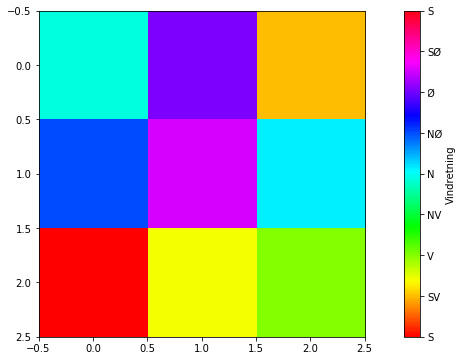

In [323]:
wind_dir = np.degrees(np.arctan2(-np.array([[0, 20, 10], [-5, -18, -1], [1, -20, 3]], dtype="float"), -np.array([[10, 10, 0], [-5, 8, -10], [-11, 1, 3]], dtype="float")))
print(wind_dir)
plt_wind_dir(wind_dir)

## Using MEPS-grid data

In [324]:
#nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_default2_5km_latest.nc")
#nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/meps25files/meps_det_pp_2_5km_latest.nc")
#nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/aromemetcoopstarc/2017/05/03/AROME_MetCoOp_18_DEF.nc_20170503")
nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/meps25epsarchive/2017/11/16/meps_mbr0_pp_2_5km_20171116T06Z.nc")

In [325]:
time_v = nc.variables['time']

# Choose a time-step
t_index = 11
# Choose a pressure level (if applicable)
p_index = 10 # 12=1000hPa, 11=925hPa, 10=850hPa, ..., 7=500hPa, ..., 0=50hPa in arome_metcoop_test

ts = netCDF4.num2date(time_v[t_index], time_v.units)
print(ts)

2017-11-16 17:00:00


### Wind gusts

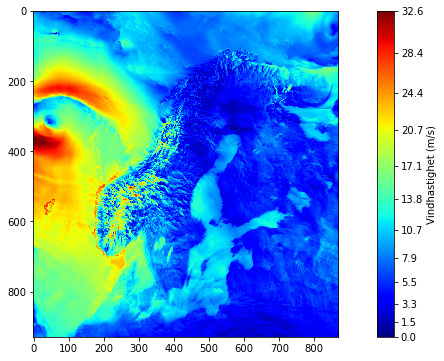

In [326]:
wind_gust_v = nc.variables['wind_speed_of_gust']
plt_wind_speed(wind_gust_v[t_index, :, :])

### Wind speed x and y components

In [327]:
wind_x_v = nc.variables['x_wind_10m']
wind_y_v = nc.variables['y_wind_10m']

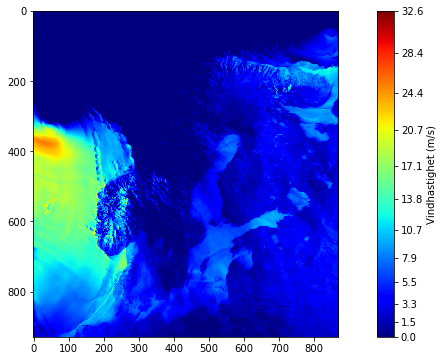

In [328]:
plt_wind_speed(wind_x_v[t_index, :, :])

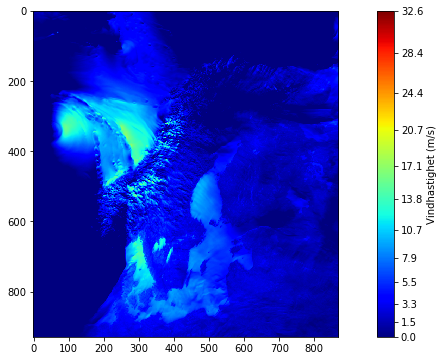

In [329]:
plt_wind_speed(wind_y_v[t_index, :, :])

### Wind speed

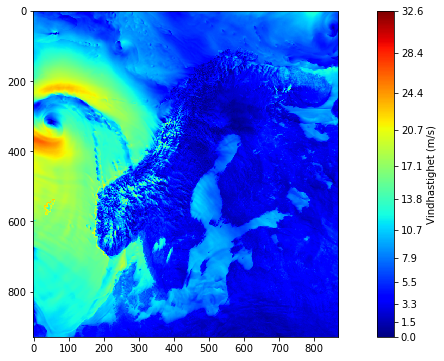

In [330]:
wind_speed = np.sqrt(wind_x_v[t_index, :, :]**2 + wind_y_v[t_index, :, :]**2)
plt_wind_speed(wind_speed)

### Wind direction

The calculated vector indicates the direction to where the wind is blowing to, while we want to indicate the direction it is coming from in a wind map.
Therefore we need to __invert__ the *x* and *y* components of the vector before calculating the angle. 

In [331]:
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_index, :, :], -wind_y_v[t_index, :, :]))

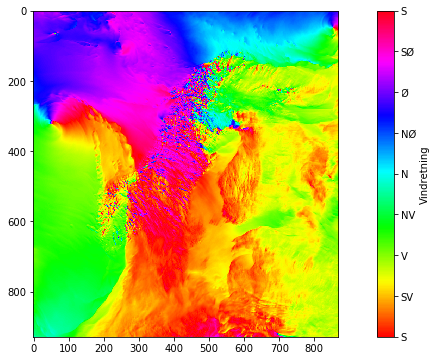

In [332]:
plt_wind_dir(wind_dir)

## Analysis over a 24h period
### Retrieve data for a defined rectangle and period

In [333]:
### Lofoten
x_range = np.arange(360, 430)
y_range = np.arange(650,730)

### Langfjella
#x_range = np.arange(160, 260)
#y_range = np.arange(270,320)

### Hordalandskysten
x_range = np.arange(160, 220)
y_range = np.arange(290,370)

t_range = np.arange(18,42)

t1 = netCDF4.num2date(time_v[t_range[0]], time_v.units)
t2 = netCDF4.num2date(time_v[t_range[-1]], time_v.units)
t_info = "Period: {0} - {1}".format(t1, t2)

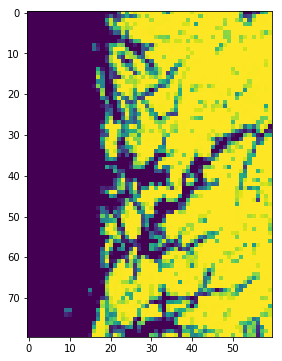

In [334]:
laf = nc.variables["land_area_fraction"][y_range, x_range]
plt.imshow(np.flipud(laf))

In [335]:
wind_speed = np.sqrt(wind_x_v[t_range, y_range, x_range]**2 + wind_y_v[t_range, y_range, x_range]**2)

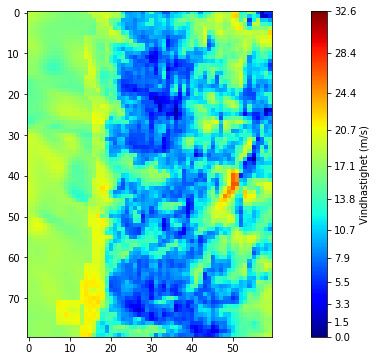

In [336]:
plt_wind_speed(wind_speed[5,:,:])

In [337]:
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_range, y_range, x_range], -wind_y_v[t_range, y_range, x_range]))
snow_dep = np.degrees(np.arctan2(wind_x_v[t_range, y_range, x_range], wind_y_v[t_range, y_range, x_range]))

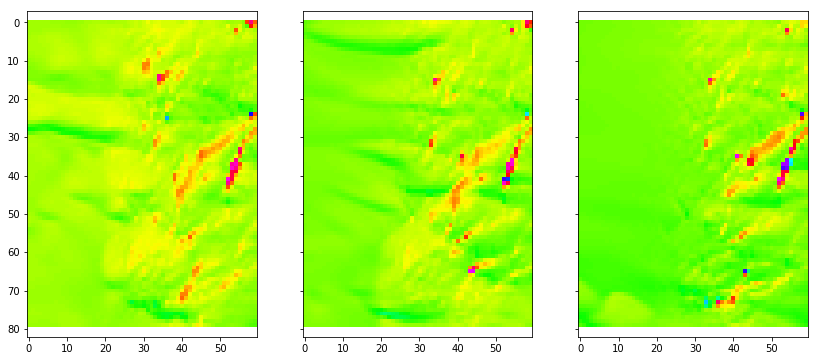

In [338]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
ax1.imshow(np.flipud(wind_dir[5,:,:]), cmap=plt.cm.hsv,vmin=-180, vmax=180)
ax2.imshow(np.flipud(wind_dir[10,:,:]), cmap=plt.cm.hsv,vmin=-180, vmax=180)
ax3.imshow(np.flipud(wind_dir[15,:,:]), cmap=plt.cm.hsv,vmin=-180, vmax=180)

In [339]:
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
snow_dep_f = snow_dep.flatten()
print(wind_dir_f.shape, wind_speed_f.shape)
len_wind = len(wind_speed_f)

(115200,) (115200,)


In [340]:
classify_wind(wind_speed_f, wind_dir_f)

[0.08854166666666666, 0.06684027777777778, 0.08506944444444443, 0.265625, 0.09114583333333333, 1.6206597222222223, 3.091145833333333, 0.65625]
[0.008680555555555556, 0.005208333333333334, 0.014756944444444444, 0.11631944444444443, 0.034722222222222224, 4.5703125, 39.00694444444445, 1.7656249999999998]
[0.0, 0.0, 0.0, 0.0008680555555555555, 0.0, 0.29340277777777773, 44.69965277777778, 1.0147569444444444]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 2.290798611111111, 0.05381944444444445]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


'var light_winds = [0.08854166666666666, 0.06684027777777778, 0.08506944444444443, 0.265625, 0.09114583333333333, 1.6206597222222223, 3.091145833333333, 0.65625];\nvar breeze = [0.008680555555555556, 0.005208333333333334, 0.014756944444444444, 0.11631944444444443, 0.034722222222222224, 4.5703125, 39.00694444444445, 1.7656249999999998];\nvar gale = [0.0, 0.0, 0.0, 0.0008680555555555555, 0.0, 0.29340277777777773, 44.69965277777778, 1.0147569444444444];\nvar storm = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078125, 2.290798611111111, 0.05381944444444445];\nvar hurricane = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];'

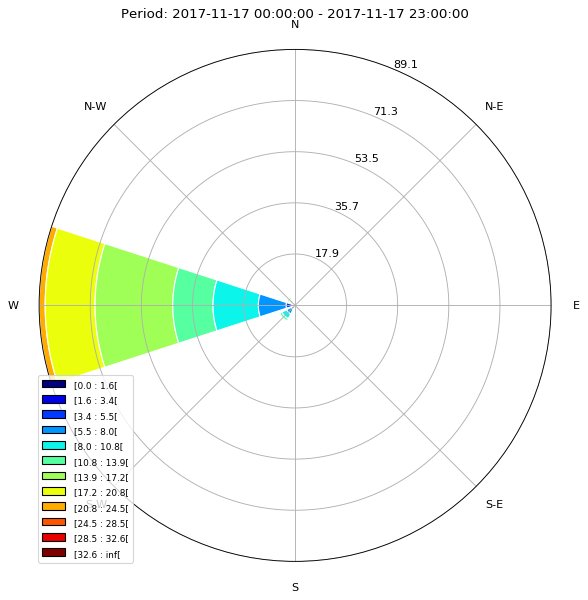

In [341]:
plt_windrose(wind_dir_f, wind_speed_f, t_info)

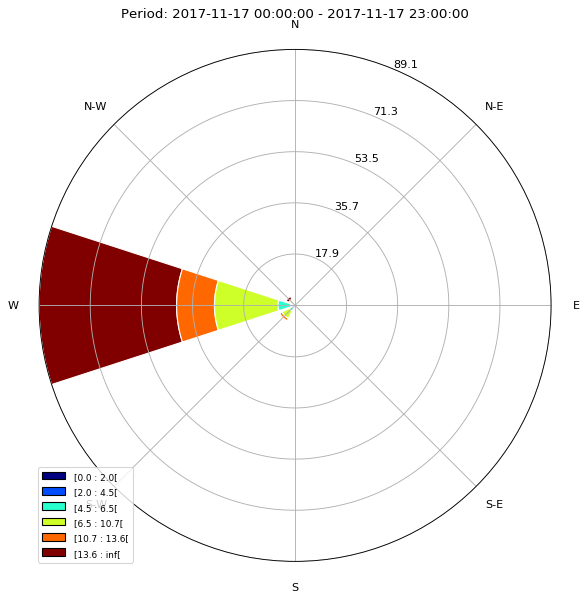

In [342]:
plt_windrose_transport(wind_dir_f, wind_speed_f, t_info)

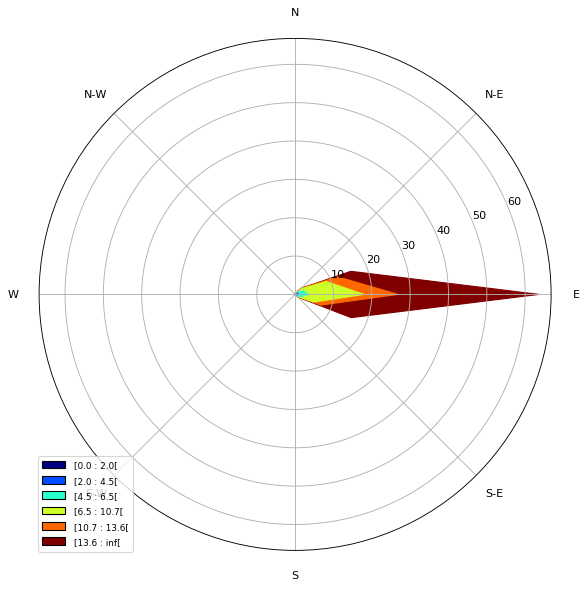

In [343]:
plt_snow_transport(snow_dep_f, wind_speed_f)

In [344]:
snow_classes = classify_wind_transport(wind_speed_f, snow_dep_f, js_str=True)
print(snow_classes)

[0.11284722222222221, 0.44357638888888895, 0.4678819444444445, 0.2152777777777778, 0.01996527777777778, 0.0, 0.0, 0.0]
[0.12239583333333334, 1.0477430555555556, 2.623263888888889, 0.4704861111111111, 0.006944444444444444, 0.0, 0.0, 0.0]
[0.07118055555555555, 1.7300347222222223, 9.122395833333332, 0.6414930555555556, 0.0008680555555555555, 0.0, 0.0, 0.0]
[0.019097222222222224, 1.8810763888888888, 15.844618055555557, 0.6119791666666666, 0.0, 0.0, 0.0, 0.0]
[0.008680555555555556, 1.2065972222222223, 61.03038194444444, 1.5824652777777777, 0.0, 0.0, 0.0, 0.0]
var no_transport = [0.11284722222222221, 0.44357638888888895, 0.4678819444444445, 0.2152777777777778, 0.01996527777777778, 0.0, 0.0, 0.0];
var snowfall = [0.12239583333333334, 1.0477430555555556, 2.623263888888889, 0.4704861111111111, 0.006944444444444444, 0.0, 0.0, 0.0];
var dry_snow = [0.07118055555555555, 1.7300347222222223, 9.122395833333332, 0.6414930555555556, 0.0008680555555555555, 0.0, 0.0, 0.0];
var wet_snow = [0.0190972222222

## Using wind data on xgeo-grid

Possible issues: 

 - I do not have to use the flipud function for the xgeo-gridded data. Does that influence the wind direction, i.e. is the y-vector in the opposite direction between the two data sets???


In [345]:
# Load region mask
vr = netCDF4.Dataset(r"../data/terrain_parameters/VarslingsOmr_2017.nc", "r")

regions = vr.variables["VarslingsOmr_2017"][:]

#ID = 3014 # Lofoten & Vesterålen
#ID = 3029 # Indre Sogn
ID = 3033 # Hordalandskysten
region_mask = np.where(regions==ID)
# get the lower left and upper right corner of a rectangle around the region
y_min, y_max, x_min, x_max = min(region_mask[0].flatten()), max(region_mask[0].flatten()), min(region_mask[1].flatten()), max(region_mask[1].flatten())

In [347]:
#nc = netCDF4.Dataset(r"Y:\metdata\prognosis\arome\wind\netcdf\2017\arome2_5_wind_850_NVE_00_2017_04_27.nc", "r")
nc = netCDF4.Dataset(r"Y:\metdata\prognosis\meps\det\archive\2017\mepsDet00_PTW_1km_20171116.nc", "r")
time_v = nc.variables['time']

wind_x_v = nc.variables['x_wind_10m']
wind_y_v = nc.variables['y_wind_10m']

In [356]:
x1, x2 = x_min, x_max # possible to add a buffer of step_x
y1, y2 = y_min, y_max # possible to add a buffer of step_y

print("Time period: {0} - {1}".format(netCDF4.num2date(time_v[24], time_v.units), netCDF4.num2date(time_v[47], time_v.units)))

wind_x = wind_x_v[24:48, y1:y2, x1:x2]
wind_y = wind_y_v[24:48, y1:y2, x1:x2]
print(wind_x.shape)

region_mask = regions[y1:y2, x1:x2] # redefine region_mask, now clipped to area of interest

wind_x_ma = np.ma.asarray(wind_x)
wind_y_ma = np.ma.asarray(wind_y)
for i in range(wind_x.shape[0]): 
    wind_x_ma[i, :, :] = np.ma.masked_where(region_mask!=ID, wind_x[i, :, :], copy=False)
    #print(type(wind_x[i, :, :]))
    wind_y_ma[i, :, :] = np.ma.masked_where(region_mask!=ID, wind_y[i, :, :], copy=False)

Time period: 2017-11-17 00:00:00 - 2017-11-17 23:00:00
(24, 161, 73)


**ToDo:** split data in gridcells that are above and below treeline - use an fixed treeline elvation or the vegetation mask for each cell.

In [349]:
wind_speed = np.sqrt(wind_x_ma**2 + wind_y_ma**2)
wind_dir = np.degrees(np.arctan2(-wind_x_ma, -wind_y_ma)) # check if the minus is still applicable when using the xgeo-gridded data.
snow_dep = np.degrees(np.arctan2(wind_x_ma, wind_y_ma)) # indicates the aspect where snow is deposited
print(type(wind_speed))
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
snow_dep_f = snow_dep.flatten()
print(wind_dir_f.shape, wind_speed_f.shape)

<class 'numpy.ma.core.MaskedArray'>
(282072,) (282072,)


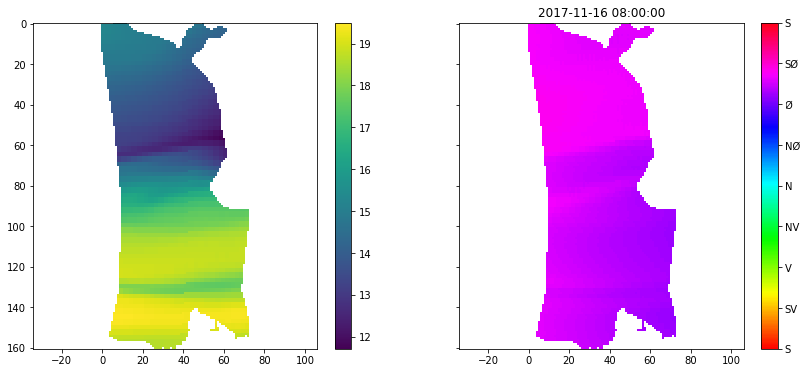

In [350]:
# Choose a time-step
t_index = 8
ts = netCDF4.num2date(time_v[t_index], time_v.units)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
plt_spd = ax1.imshow(wind_speed[t_index,:,:], aspect='equal')
plt_dir = ax2.imshow(wind_dir[t_index,:,:], cmap=plt.cm.hsv,vmin=-180, vmax=180)
plt.colorbar(ax=ax1, mappable=plt_spd)
cbar_dir = plt.colorbar(ax=ax2, mappable=plt_dir)

cbar_dir.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
cbar_dir.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])
plt.title(ts)
plt.show()

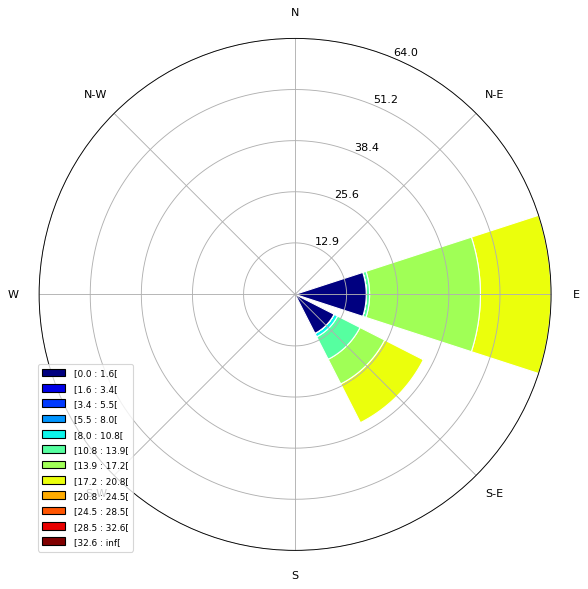

In [351]:
plt_windrose(wind_dir_f, wind_speed_f)

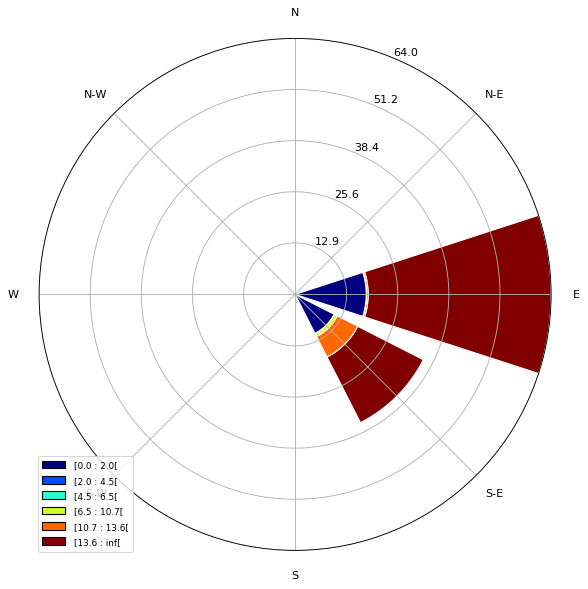

In [352]:
plt_windrose_transport(wind_dir_f, wind_speed_f)

**ToDo:** Compare wind speeds for 10m and 850hpa - 850hpa might be too high to use as a basis!

**NEXT**

Define criteria for which wind speed and direction to choose for the regional weather.

- Lower threshold for wind speeds of concern
- Threshold in % when to consider only one wind direction
- Which directions to include if several wind directions could be relevant?

***CHECK*** Looks like there is a bug. Percentages do not add up to 100% and values are generally too low...

In [353]:
wind_classes = classify_wind_transport(wind_speed_f, wind_dir_f, js_str=True)
print(wind_classes)

[0.0, 0.056368586743810095, 17.772767236733884, 10.929478998269945, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.8728267959953487, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.018435009501120283, 46.188916305056864, 24.161207067699028, 0.0, 0.0, 0.0, 0.0]
var no_transport = [0.0, 0.056368586743810095, 17.772767236733884, 10.929478998269945, 0.0, 0.0, 0.0, 0.0];
var snowfall = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
var dry_snow = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
var wet_snow = [0.0, 0.0, 0.0, 0.8728267959953487, 0.0, 0.0, 0.0, 0.0];
var all_snow = [0.0, 0.018435009501120283, 46.188916305056864, 24.161207067699028, 0.0, 0.0, 0.0, 0.0];


(array([   428.,  17073.,  30559.,  34196.,  40141.,  44162.,  24255.,
          6203.,   3201.,    734.]),
 array([  64.47825623,   73.75493164,   83.03160706,   92.30828247,
         101.58495789,  110.8616333 ,  120.13830872,  129.41498413,
         138.69165955,  147.96833496,  157.24501038]),
 <a list of 10 Patch objects>)

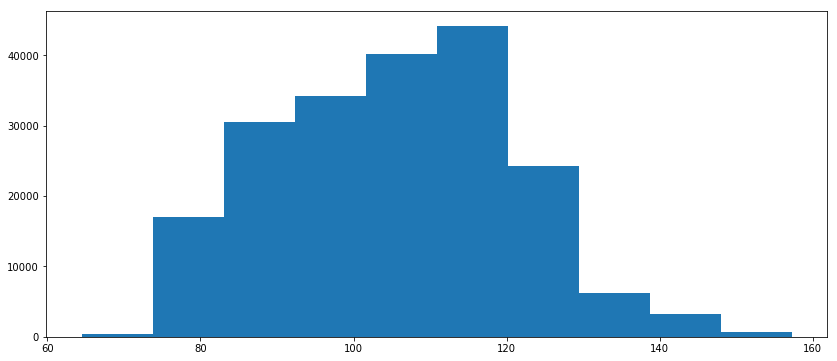

In [354]:
dominant = wind_dir_f[np.where(wind_speed_f>7.0)]
plt.hist(dominant)

In [355]:
snow_classes = classify_wind_transport(wind_speed_f, snow_dep_f, js_str=True)
print(snow_classes)

[0.0010635582404492471, 0.0, 0.0, 0.0, 0.0, 0.056368586743810095, 17.772767236733884, 10.928415440029497]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8728267959953487]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.018435009501120283, 46.188916305056864, 24.161207067699028]
var no_transport = [0.0010635582404492471, 0.0, 0.0, 0.0, 0.0, 0.056368586743810095, 17.772767236733884, 10.928415440029497];
var snowfall = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
var dry_snow = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
var wet_snow = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8728267959953487];
var all_snow = [0.0, 0.0, 0.0, 0.0, 0.0, 0.018435009501120283, 46.188916305056864, 24.161207067699028];


## Comparing different pressure levels from AROME-MetCoOp

In [34]:
nc_url = "http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_test2_5km_latest.nc"
#nc_url = "http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_test2_5km_20170423_06.nc"
nc = netCDF4.Dataset(nc_url, 'r')

In [35]:
time_v = nc.variables['time']
pressure_v = nc.variables['pressure']
wind_x_v = nc.variables['x_wind_pl']
wind_y_v = nc.variables['y_wind_pl']

# Choose a time-period and spatial extent
x_range = np.arange(300, 400)
y_range = np.arange(600,750)
t_range = np.arange(6,30)
# Choose a pressure level (if applicable)
p_index = [12,11,10,7] # 12=1000hPa, 11=925hPa, 10=850hPa, ..., 7=500hPa, ..., 0=50hPa in arome_metcoop_test

(360000,) (360000,)
(360000,) (360000,)
(360000,) (360000,)
(360000,) (360000,)


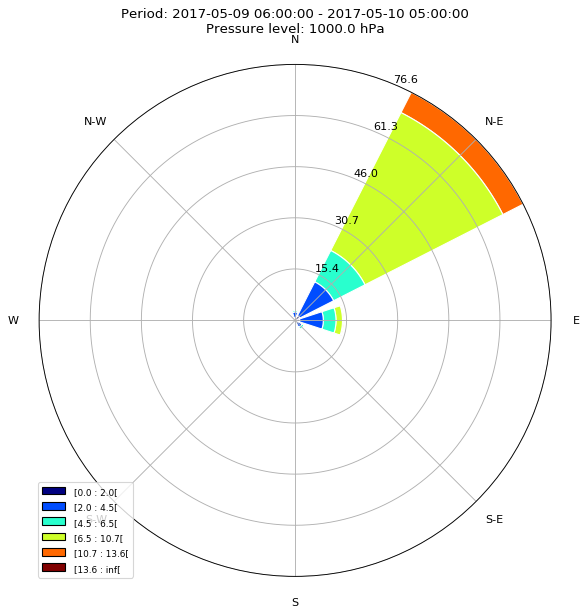

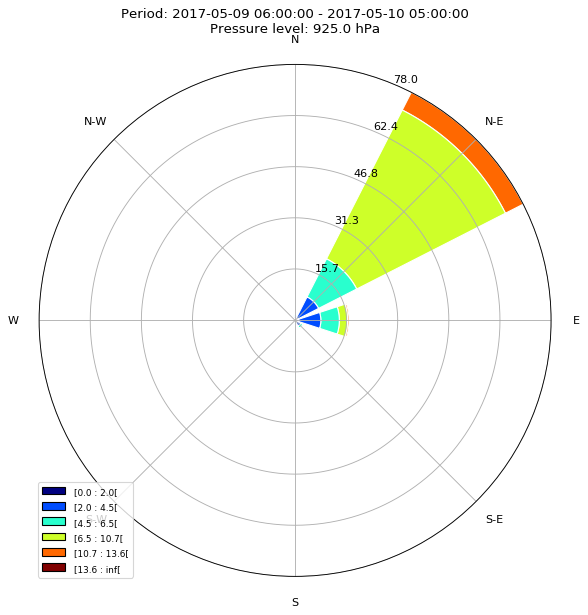

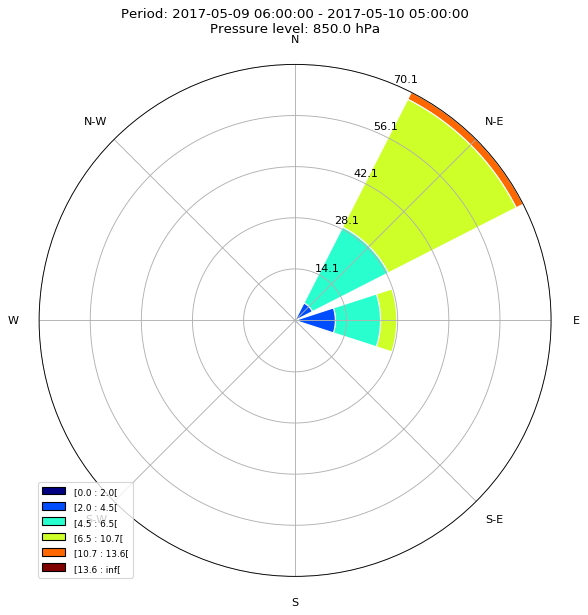

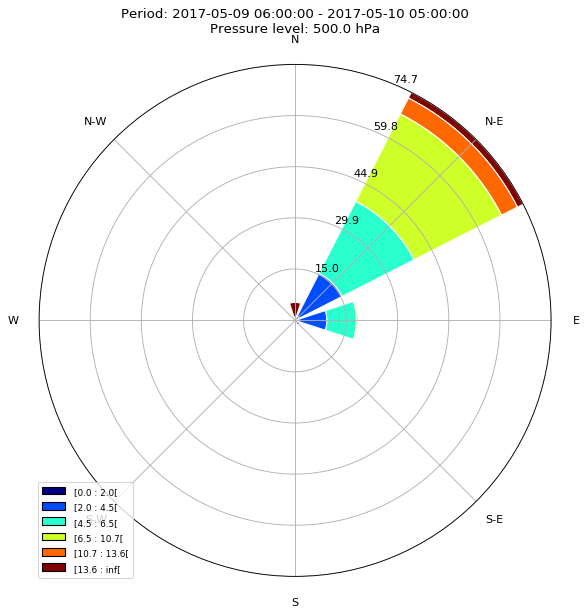

In [36]:
t1 = netCDF4.num2date(time_v[t_range[0]], time_v.units)
t2 = netCDF4.num2date(time_v[t_range[-1]], time_v.units)

wind_speed = np.sqrt(wind_x_v[t_range, p_index, y_range, x_range]**2 + wind_y_v[t_range, p_index, y_range, x_range]**2)
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_range, p_index, y_range, x_range], -wind_y_v[t_range, p_index, y_range, x_range]))

#f, axarr = plt.subplots(2, 2)
f = plt.figure(figsize=(12, 12))
i = 0

for pl in p_index: #p_index must be of length 4 at max
    
    # Flatten arrays
    wind_dir_f = wind_dir[:, i, :, :].flatten()
    wind_speed_f = wind_speed[:, i, :, :].flatten()
    print(wind_dir_f.shape, wind_speed_f.shape)
    
    t_info = "Period: {0} - {1}\nPressure level: {2} hPa".format(t1, t2, pressure_v[pl])
    
    ax = plt_windrose_transport(wind_dir_f, wind_speed_f, t_info)
    
    #f.add_axes(ax)
    #plt.savefig("windrose_pl_{0}.png".format(pl), dpi=90)
    
    i+=1

**TODO:** Would be nice to get the plots equal in size.

## Visualising snow deposition

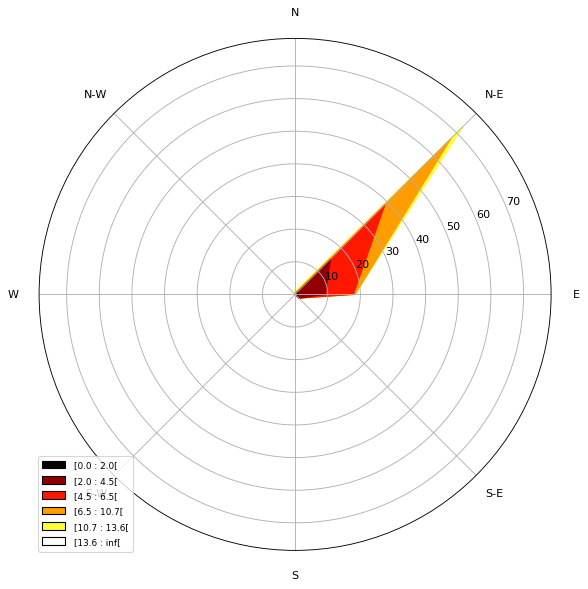

In [42]:
plt_snow_transport(wind_dir_f, wind_speed_f)